# Transfer Learning

## 1. VGG

### Load, Transform and Visualize Data

In [1]:
import os, shutil
import numpy as np
import torch
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
original_dataset_dir = '/Users/Shazzad Hasan/Deep_Learning/datasets/cat_vs_dog'
base_dir = '/Users/Shazzad Hasan/Deep_Learning/datasets/cats_and_dogs_small'
os.mkdir(base_dir)

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our validation cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our validation dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# Copy first 1000 cat images to train_cats_dir
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join('/Users/Shazzad Hasan/Deep_Learning/datasets/cat_vs_dog/cat', fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join('/Users/Shazzad Hasan/Deep_Learning/datasets/cat_vs_dog/cat', fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join('/Users/Shazzad Hasan/Deep_Learning/datasets/cat_vs_dog/cat', fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join('/Users/Shazzad Hasan/Deep_Learning/datasets/cat_vs_dog/dog', fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join('/Users/Shazzad Hasan/Deep_Learning/datasets/cat_vs_dog/dog', fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join('/Users/Shazzad Hasan/Deep_Learning/datasets/cat_vs_dog/dog', fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [4]:
classes = ['cats', 'dogs']

#### Transforming the Data

In [18]:
data_transform = transforms.Compose([transforms.RandomResizedCrop(299), transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=data_transform)
validation_data = datasets.ImageFolder(validation_dir, transform=data_transform)
test_data = datasets.ImageFolder(test_dir, transform=data_transform)

print('Number of training images: ', len(train_data))
print('Number of validation images: ', len(validation_data))
print('Number of test images: ', len(test_data))

Number of training images:  2000
Number of validation images:  1000
Number of test images:  1000


#### DataLoaders and Data Visualization

In [19]:
batch_size = 20
num_workers = 0
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle=True)

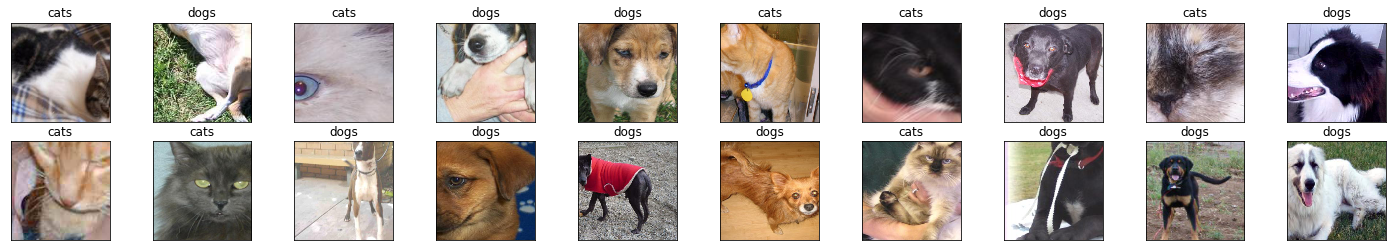

In [20]:
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

## Define the Model

Step-1: Load in a pre-trained model

Step-2: Freeze all the parameters 

Step-3: Remove the last layer

Step-4: Replace the last leyer with a linier classifier of our own

In [8]:
# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available. Training on CPU')
else:
    print('CUDA is available! Training on GPU') 

CUDA is not available. Training on CPU


#### inceptionv3

In [10]:
# load the pretrained model form pytorch
inceptionv3 = models.inception_v3(pretrained=True)
# print our the model structure
print(inceptionv3)

Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to C:\Users\Shazzad Hasan/.cache\torch\checkpoints\inception_v3_google-1a9a5a14.pth


HBox(children=(FloatProgress(value=0.0, max=108857766.0), HTML(value='')))


Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, 

In [11]:
print(inceptionv3.fc.in_features)
print(inceptionv3.fc.out_features)

2048
1000


In [13]:
# Freeze training for all 'features' layers
for param in inceptionv3.parameters():
    param.requires_grad = False

## Final Classifier Layer

In [15]:
import torch.nn as nn

n_inputs = inceptionv3.fc.in_features

# add last linear layer (n_inputs -> 2 pet classes)
# new layers automatically have requires_grad = True
last_layer = nn.Linear(n_inputs, len(classes))

inceptionv3.fc = last_layer

# if GPU is available, move the model to GPU
if train_on_gpu:
    vgg16.cuda()

# check to see that your last layer produces the expected number of outputs
print(inceptionv3.fc.out_features)
#print(inceptionv3)

2


## Specify Loss Function and Optimizer

In [25]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()
inceptionv3.aux_logits = False

# specify optimizer (SGD) and learning rate
optimizer = optim.SGD(inceptionv3.fc.parameters(), lr=0.01)

## Training

In [26]:
# number of epoch to train the model
n_epochs = 1

for epoch in range(1, n_epochs+1):
    
    # keep track on training and validation loss
    train_loss = 0.0
    
    #####################
    # Train the model
    #####################
    for batch_i, (data, target) in enumerate(train_loader):
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass
        output = inceptionv3(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass
        loss.backward()
        # optimization (update parameters)
        optimizer.step()
        # update training loss
        train_loss += loss.item()
        
        # print training loss every specified number of mini-batches
        if batch_i % 20 == 19:
            print('Epoch %d, Batch %d, loss: %.16f' % 
                  (epoch, batch_i + 1, train_loss/20))
            train_loss = 0.0

Epoch 1, Batch 20, loss: 0.5963346883654594
Epoch 1, Batch 40, loss: 0.4476575165987015


C:\Users\Shazzad Hasan\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Shazzad Hasan\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Shazzad Hasan\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Shazzad Hasan\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\Shazzad Hasan\Anaconda3\lib\site-packages\PIL\TiffImagePlu

Epoch 1, Batch 60, loss: 0.3777571603655815
Epoch 1, Batch 80, loss: 0.3508142545819283
Epoch 1, Batch 100, loss: 0.2811957709491253


### Testing

In [27]:
# track test loss 
# over 5 flower classes
test_loss = 0.0
class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))

inceptionv3.eval() # eval mode

# iterate over test data
for data, target in test_loader:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = inceptionv3(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update  test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(2):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.251132

Test Accuracy of  cats: 86% (430/500)
Test Accuracy of  dogs: 98% (492/500)

Test Accuracy (Overall): 92% (922/1000)


### Visualize Sample Test Results

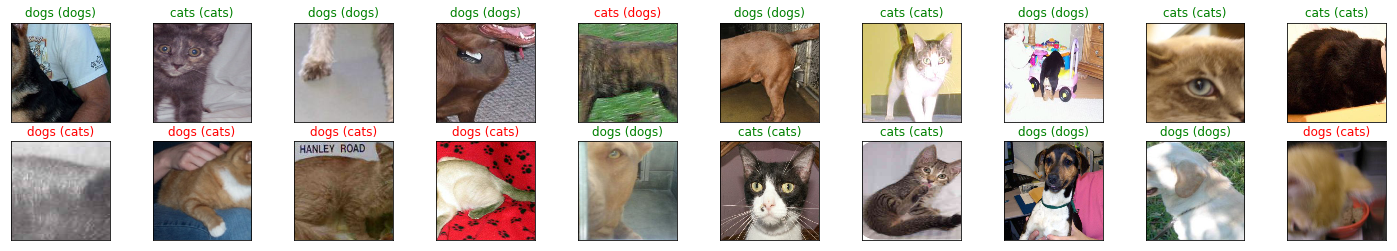

In [30]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = inceptionv3(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))